In [1]:
import importlib
from importlib import reload
import ursse.sync_motion_simulation as sms
import numpy as np

In [2]:
reload(sms)

<module 'ursse.sync_motion_simulation' from '/home/ilobach/ursse/ursse/sync_motion_simulation.py'>

In [3]:
model = sms.Model(rf_noise_std=7e-5)

In [4]:
%%time
res = model.simulate(load=True)

working on 1 out of 5
working on 2 out of 5
working on 3 out of 5
working on 4 out of 5
working on 5 out of 5
CPU times: user 505 ms, sys: 98.6 ms, total: 604 ms
Wall time: 847 ms


In [5]:
# Saving simulation results to save time during developing
# import pandas as pd
# import os 
# from ursse.path_assistant import PathAssistant
# for f in model.files_and_pars:
#     f['sim_df_before_spad'].to_pickle(os.path.join(PathAssistant(f['shift']).get_shift_cache_folder_path(), f['file'].replace(".ptu", "_sim.pkl")))

In [6]:
%%time
model.spad_tts = 0.400
res = model.add_spad_tts_do_fitting_and_binning(verbose=True)

working on file number 1 out of 5
working on file number 2 out of 5
working on file number 3 out of 5
working on file number 4 out of 5
working on file number 5 out of 5
CPU times: user 1min 57s, sys: 15 s, total: 2min 12s
Wall time: 2min 13s


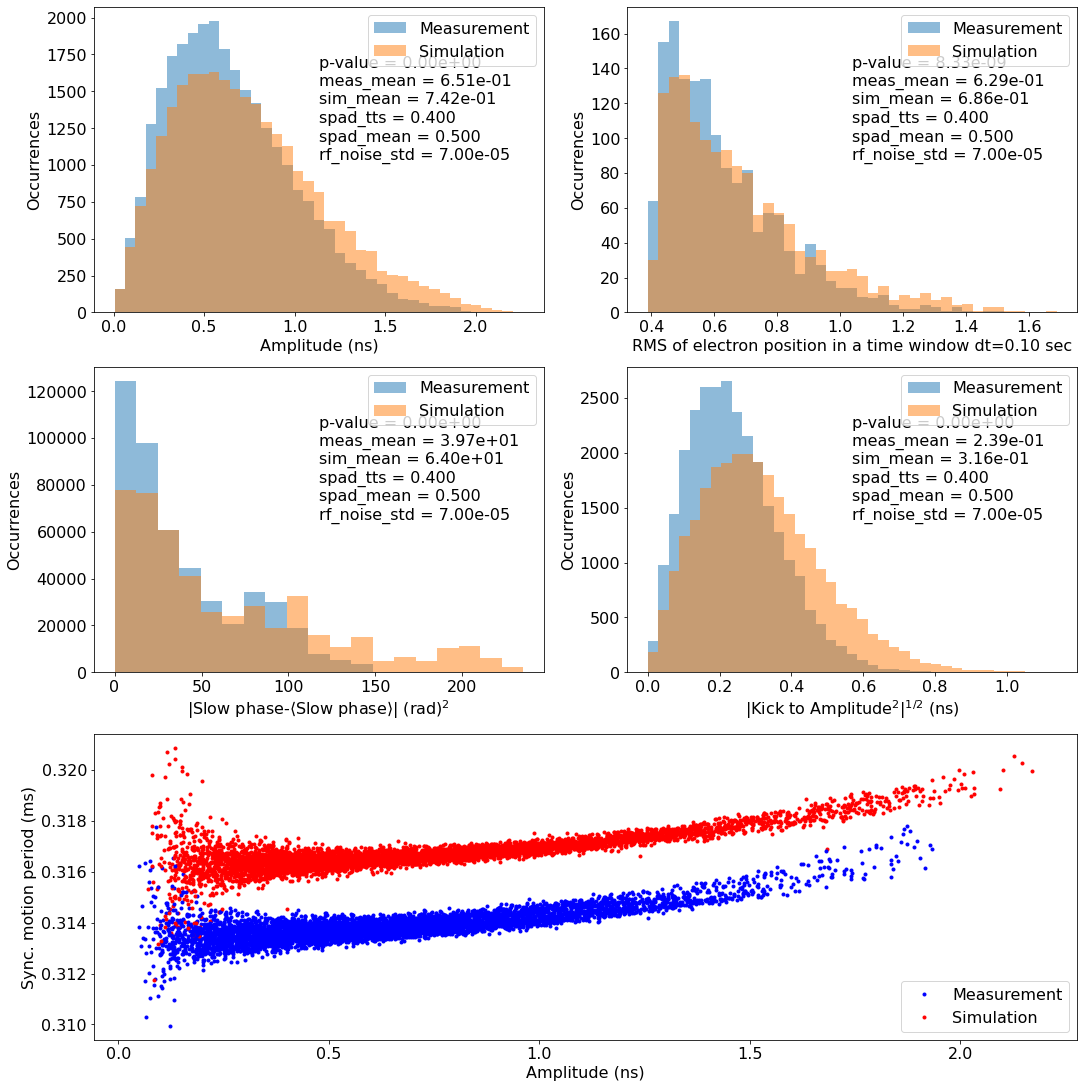

In [12]:
fig = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])
features = ['amplitude', 'rms_length', 'slow_phase', 'kick_to_amplitude']
nbins_arr = [40, 40, 20, 40]
for feat, nbins, ax in zip(features, nbins_arr, [ax1, ax2, ax3, ax4]):
    hist_dic = model.get_meas_sim_comparison(feature=feat, nbins=nbins, ax=ax)
model.plot_meas_sim_amp_period_corr(ax5)
plt.show()